In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

file_path = 'Cost of Resistance Database_cleaned.xlsx'
df = pd.read_excel(file_path)

df.replace('inf',np.inf, inplace=True)

In [170]:
ic50_res = df['IC50 of Resistant Population']
ic50_sens = df['IC50 of Sensitive Population']

dt_res = df['Doubling Time of Resistant Population (in h)']
dt_sens = df['Doubling Time of Sensitive Population (in h)']

ic50_ratio = ic50_res/ic50_sens
dt_ratio = dt_res/dt_sens


In [171]:
df.rename(columns={'Drug Type (Chemotherapy, targeted therapy, radiation)': 'Drug Type',
                   'Cancer Type (e.g. Lung, skin, ovarian)':'Cancer Type'}, inplace=True)

# change entry 'Targeted Therapy' to 'Targeted'

df['Drug Type'].replace('Targeted Therapy','Targeted',inplace=True)

# change 'Colorectal Carcinoma' to 'Colorectal'ArithmeticError

df['Cancer Type'].replace('Colorectal Carcinoma','Colorectal',inplace=True)

# change 'Lung Adenocarcinoma' to 'NSCLC'

df['Cancer Type'].replace('Lung Adenocarcinoma','NSCLC',inplace=True)

# change 'Lung adenocarcinoma' to 'NSCLC'

df['Cancer Type'].replace('Lung adenocarcinoma','NSCLC',inplace=True)

# change 'Lung Adenocarcinoma (Derived from metastatic lymph site)' to 'NSCLC'

df['Cancer Type'].replace('Lung Adenocarcinoma (Derived from metastatic lymph site)','NSCLC',inplace=True)

df['Cancer Type'].replace('Renal cell carcinoma','RCC',inplace=True)

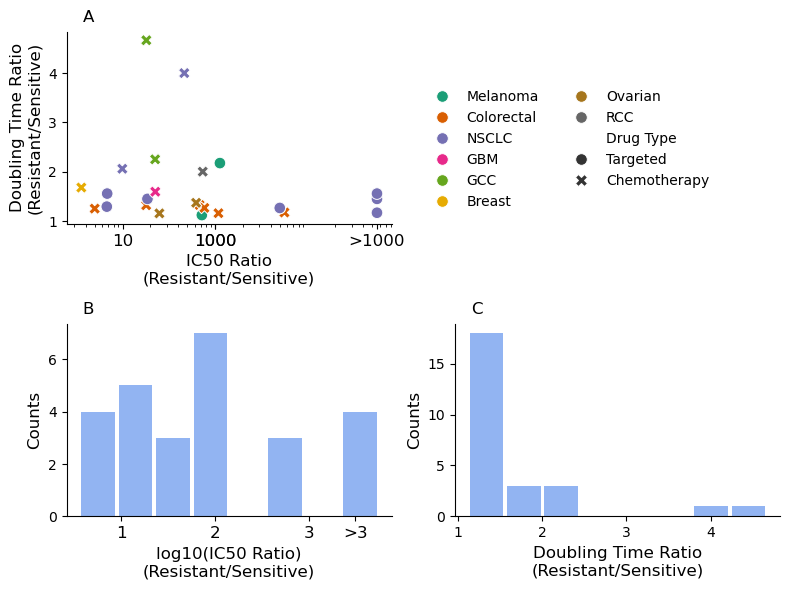

In [190]:
# fig,ax_list = plt.subplots(ncols=3,figsize=(9,3))

# arrange the subplots in the a 2x2 grid

fig,ax_list = plt.subplots(ncols=2,nrows=2,figsize=(8,6))

ax = ax_list[0,0]

ic50_ratio_t = ic50_ratio.copy()
ic50_ratio_t[ic50_ratio_t == np.inf] = np.max(ic50_ratio_t[ic50_ratio_t != np.inf])*10

scatter = sns.scatterplot(x=ic50_ratio_t, y=dt_ratio, hue=df['Cancer Type'], style=df['Drug Type'],ax=ax,
                          palette=sns.color_palette("Dark2",n_colors=8),s=70)

# Set labels and title
ax.set_xlabel('IC50 Ratio\n(Resistant/Sensitive)', fontsize=12)
ax.set_ylabel('Doubling Time Ratio\n(Resistant/Sensitive)', fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_yticks([1,2,3,4])

ax.set_xticks([10,100,100,np.max(ic50_ratio_t)])
ax.set_xticklabels(['10','100','1000','>1000'],fontsize=12)

ax.annotate('A',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

# delete the upper right axes and replace with legend

ax.get_legend().remove()

handles, labels = scatter.get_legend_handles_labels()

ax = ax_list[0,1]

# replace 'Breast adenocarcinoma' with 'Breast'

labels[labels.index('Breast adenocarcinoma')] = 'Breast'

# replace CNS glioblastoma with GBM

labels[labels.index('CNS glioblastoma')] = 'GBM'

# replace Germ cell carcinoma with GCC

labels[labels.index('Germ cell carcinoma')] = 'GCC'

ax.legend(handles[1:], labels[1:],frameon=False,fontsize=10,ncol=2,
          loc=(-0.1,0.05))

ax.axis('off')

# filter infinit ic50

# dt_ratio = dt_ratio[ic50_ratio != np.inf]
# ic50_ratio = ic50_ratio[ic50_ratio != np.inf]

ax = ax_list[1,0]

ax.hist(np.log10(ic50_ratio_t),bins=8,rwidth=0.9,color='cornflowerblue',alpha=0.7)

ax.set_xlabel('log10(IC50 Ratio)\n(Resistant/Sensitive)',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)

ax.annotate('B',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

ax.set_xticks([1,2,3,3.5])
ax.set_xticklabels(['1','2','3','>3'],fontsize=12)

ax = ax_list[1,1]

ax.hist(dt_ratio,bins=8,rwidth=0.9,color='cornflowerblue',alpha=0.7)

ax.set_xlabel('Doubling Time Ratio\n(Resistant/Sensitive)',fontsize=12)
ax.set_ylabel('Counts',fontsize=12)

ax.annotate('C',xy=(0.05,1.05),xycoords='axes fraction',fontsize=12)

for ax in ax_list.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.tight_layout()

fig.savefig('summary_fig.pdf',bbox_inches='tight')


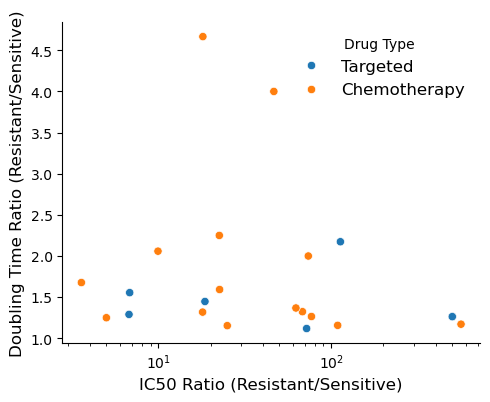

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,4))

# Scatter plot
scatter = sns.scatterplot(x=ic50_ratio, y=dt_ratio, hue=df['Drug Type'], ax=ax)

# Set labels and title
ax.set_xlabel('IC50 Ratio (Resistant/Sensitive)', fontsize=12)
ax.set_ylabel('Doubling Time Ratio (Resistant/Sensitive)', fontsize=12)
# ax.set_title('IC50 Ratio vs. Doubling Time Ratio', fontsize=12)

# Create a legend
ax.legend(title='Drug Type', fontsize=12,frameon=False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
ax.set_xscale('log')
# ax.set_yscale('log')
fig.tight_layout()

/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_47436/987029418.py:4: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  scatter = sns.scatterplot(x=ic50_ratio, y=dt_ratio, hue=df['Cancer Type'], style=df['Drug Type'],ax=ax,


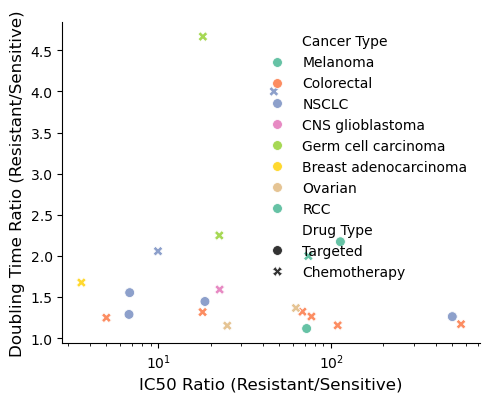

In [174]:
fig, ax = plt.subplots(figsize=(5,4))

# Scatter plot
scatter = sns.scatterplot(x=ic50_ratio, y=dt_ratio, hue=df['Cancer Type'], style=df['Drug Type'],ax=ax,
                          palette=sns.color_palette("Set2",n_colors=7),s=50)

# Set labels and title
ax.set_xlabel('IC50 Ratio (Resistant/Sensitive)', fontsize=12)
ax.set_ylabel('Doubling Time Ratio (Resistant/Sensitive)', fontsize=12)

# Create a legend
ax.legend(frameon=False,fontsize=10)

# turn off legend
# ax.get_legend().remove()

# ax.set_ylim(1,2.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
ax.set_xscale('log')
fig.tight_layout()


In [175]:
# generate a list of lists of dt_ratio for each cancer type

dt_ratio_list = []
for cancer_type in df['Cancer Type'].unique():
    dt_ratio_list.append(list(dt_ratio[df['Cancer Type']==cancer_type]))

# print(dt_ratio_list)

# Perform Kruskal-Wallis test
    
statistic, p_value = stats.kruskal(*dt_ratio_list)

print('Cancer Type versus Doubling Time Ratio')

# Print the results
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)


Cancer Type versus Doubling Time Ratio
Kruskal-Wallis Test:
Statistic: 10.415175375805315
p-value: 0.16624099935341163


In [176]:
# generate a list of lists of dt_ratio for each cancer type

ic50_ratio_list = []
for cancer_type in df['Cancer Type'].unique():
    ic50_ratio_list.append(list(ic50_ratio[df['Cancer Type']==cancer_type]))

# print(dt_ratio_list)

# Perform Kruskal-Wallis test
    
statistic, p_value = stats.kruskal(*ic50_ratio_list)

print('Cancer Type versus IC50 Ratio')

# Print the results
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Cancer Type versus IC50 Ratio
Kruskal-Wallis Test:
Statistic: 5.335267569310127
p-value: 0.6191207278221653


In [177]:
# generate a list of lists of dt_ratio for each cancer type

dt_ratio_list = []
for drug_type in df['Drug Type'].unique():
    dt_ratio_list.append(list(dt_ratio[df['Drug Type']==drug_type]))

# print(dt_ratio_list)

# Perform Kruskal-Wallis test
    
statistic, p_value = stats.kruskal(*dt_ratio_list)

print('Drug Type versus Doubling Time Ratio')

# Print the results
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Drug Type versus Doubling Time Ratio
Kruskal-Wallis Test:
Statistic: 1.246822902077953
p-value: 0.26416015442301144


In [178]:
# generate a list of lists of dt_ratio for each cancer type

ic50_ratio_list = []
for drug_type in df['Drug Type'].unique():
    ic50_ratio_list.append(list(ic50_ratio[df['Drug Type']==drug_type]))

# print(dt_ratio_list)

# Perform Kruskal-Wallis test
    
statistic, p_value = stats.kruskal(*ic50_ratio_list)

print('Drug Type versus IC50 Ratio')

# Print the results
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

Drug Type versus IC50 Ratio
Kruskal-Wallis Test:
Statistic: 4.218558266259018
p-value: 0.039984121011998816


Pearson Correlation Coefficient: -0.15964068910252155
p-value: 0.47792447634524704


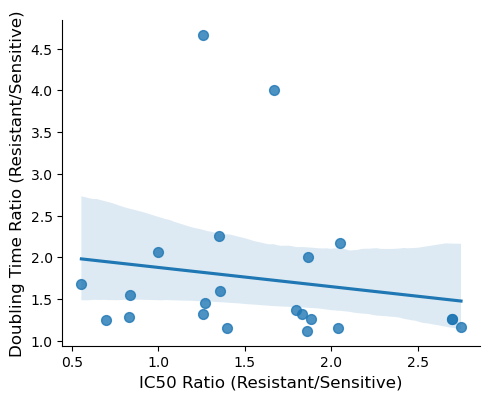

In [179]:
# Calculate the Pearson correlation coefficient and p-value

# filter infinit ic50

dt_ratio_t = dt_ratio[ic50_ratio != np.inf]
ic50_ratio_t = np.log10(ic50_ratio[ic50_ratio != np.inf])

correlation, p_value = stats.pearsonr(dt_ratio_t, ic50_ratio_t)

# Print the results
print("Pearson Correlation Coefficient:", correlation)
print("p-value:", p_value)

# plot against scatter with 95% confidence interval

fig, ax = plt.subplots(figsize=(5,4))

# Scatter plot

scatter = sns.regplot(x=ic50_ratio_t, y=dt_ratio_t, ax=ax,scatter_kws={'s':50})

# Set labels and title

ax.set_xlabel('IC50 Ratio (Resistant/Sensitive)', fontsize=12)
ax.set_ylabel('Doubling Time Ratio (Resistant/Sensitive)', fontsize=12)

# Create a legend

# ax.legend(title='Drug Type', fontsize=12,frameon=False)

# Remove top and right spines

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot

# ax.set_xscale('log')
# ax.set_yscale('log')
fig.tight_layout()



Pearson Correlation Coefficient: 0.10053210023457992
p-value: 0.8301925453113141


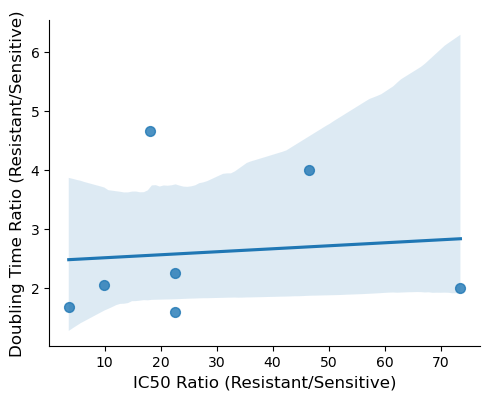

In [195]:
# Calculate the Pearson correlation coefficient and p-value

# filter infinit ic50

dt_ratio_t = dt_ratio[df['Paper Title'] == 'Resistance to Bleomycin in Cancer Cell Lines Is Characterized by Prolonged Doubling Time, Reduced DNA Damage and Evasion of G2/M Arrest and Apoptosis']
ic50_ratio_t = ic50_ratio[df['Paper Title'] == 'Resistance to Bleomycin in Cancer Cell Lines Is Characterized by Prolonged Doubling Time, Reduced DNA Damage and Evasion of G2/M Arrest and Apoptosis']

correlation, p_value = stats.pearsonr(dt_ratio_t, ic50_ratio_t)

# Print the results
print("Pearson Correlation Coefficient:", correlation)
print("p-value:", p_value)


# plot against scatter with 95% confidence interval

fig, ax = plt.subplots(figsize=(5,4))

# Scatter plot

scatter = sns.regplot(x=ic50_ratio_t, y=dt_ratio_t, ax=ax,scatter_kws={'s':50})

# Set labels and title

ax.set_xlabel('IC50 Ratio (Resistant/Sensitive)', fontsize=12)
ax.set_ylabel('Doubling Time Ratio (Resistant/Sensitive)', fontsize=12)

# ax.set_xscale('log')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot

# ax.set_xscale('log')
# ax.set_yscale('log')
fig.tight_layout()

